In [2]:
from keras.datasets import fashion_mnist
((Xtrain, Ytrain), (Xtest, Ytest)) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [3]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest[1:5])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
[2 1 1 6]


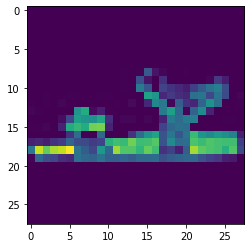

In [4]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.imshow(Xtrain[59999,:,:])
pyplot.show()

In [5]:
#Reshaping in 4D
Xtrain=Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2],1)
print("Xtrain_Shape",Xtrain.shape)
Xtest=Xtest.reshape(Xtest.shape[0],Xtest.shape[1],Xtest.shape[2],1)
print("Xtest_Shape",Xtest.shape)


Xtrain_Shape (60000, 28, 28, 1)
Xtest_Shape (10000, 28, 28, 1)


In [0]:
#for precison
Xtrain=Xtrain.astype('float')
Xtest=Xtest.astype('float')

#Normailize the data 
Xtrain=Xtrain/255
Xtest=Xtest/255

In [7]:
#from keras.utils import to_categorical
import keras
Ytrain=keras.utils.to_categorical(Ytrain)
print(Ytrain.shape)
Ytest=keras.utils.to_categorical(Ytest)
print(Ytest.shape)

(60000, 10)
(10000, 10)


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D,Flatten,Dense
model = Sequential()
model.add(Conv2D(8,(5,5),padding="valid",strides=1,name="Conv1",activation="relu",input_shape=(28,28,1)))
#practice model.add(Conv2D(8,(2,2),padding="valid",strides=1,name="Conv2"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(8,(5,5),padding="valid",strides=1,name="Conv2",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation ="softmax"))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 8, 8, 8)           1608      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)               

In [10]:
model.compile(loss = keras.losses.categorical_crossentropy,optimizer = keras.optimizers.Adadelta(),metrics =['accuracy'])
model.fit(Xtrain,Ytrain,batch_size = 32,epochs =10,verbose= 1,validation_split = 0.2)




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 30s 634us/step - loss: 11.6954 - acc: 0.2277 - val_loss: 12.8703 - val_acc: 0.2012
Epoch 2/10
48000/48000 [==============================] - 30s 616us/step - loss: 12.9114 - acc: 0.1985 - val_loss: 12.8666 - val_acc: 0.2012
Epoch 3/10
48000/48000 [==============================] - 30s 629us/step - loss: 5.5403 - acc: 0.5340 - val_loss: 0.6006 - val_acc: 0.7713
Epoch 4/10
48000/48000 [==============================] - 29s 609us/step - loss: 0.5443 - acc: 0.7991 - val_loss: 0.4939 - val_acc: 0.8207
Epoch 5/10
48000/48000 [==============================] - 30s 617us/step - loss: 0.5118 - acc: 0.8177 - val_loss: 0.5788 - val_acc: 0.8096
Epoch 6/10
48000/48000 [==============================] - 29s 609us/step - loss: 0.5518 - acc: 0.8203 - val_loss: 0.5024 - val_acc: 0.8441
Epoch 7/

In [11]:
model.evaluate(Xtest,Ytest)


10000/10000 [==============================] - 2s 241us/step


[4.364399229812622, 0.7256]

In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/Kishan(Asst2)fashion mnist.h5")

save in drive/mounting in drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
